# Data Analytics Assignment (Shakya and Amal)

Shakya Fernando (s5169761) shakya.fernando@griffithuni.edu.au<br>
Amal Norman Hakim (s5260053) amal.normanhakim@griffithuni.edu.au

https://github.com/ShakyaFernando/3030ICT-Assigment.git

## Part 1 – Data Preparation and Preprocessing [15 points]

## Imports

In [1]:
# Imports
import string
import numpy as np
import pandas as pd
from IPython.core.display import display, HTML
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from matplotlib import cm
import seaborn as sns
from collections import Counter

#set seaborn style
sns.set()
sns.set_style("whitegrid")
# Increase the width of the notebook for displaying DataFrames
display(HTML("<style>.container { width:75% !important; }</style>"))

/var/folders/9w/bz7gqryj7rq397t1r1xkrhf00000gn/T/ipykernel_83894/1583460615.py:5: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


## 1. Describe the dataset. (8 points)


In [2]:
# Read the data from CSV file
df = pd.read_csv("data.csv")
df.head()

/var/folders/9w/bz7gqryj7rq397t1r1xkrhf00000gn/T/ipykernel_83894/2749461183.py:2: DtypeWarning: Columns (0,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data.csv")


,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
1,37404337,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
2,37404356,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07T00:00:00.000Z,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,NaN
3,37404330,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07T00:00:00.000Z,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,0,30,NaN
4,37404308,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07T00:00:00.000Z,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN


### 1. Describe the dataset

In [3]:
# Describe the dataset
print("Dataset Description:")
print(df.info())

Dataset Description:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318477 entries, 0 to 318476
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 318477 non-null  object
 1   Title              318477 non-null  object
 2   Company            306473 non-null  object
 3   Date               318477 non-null  object
 4   Location           197229 non-null  object
 5   Area               122658 non-null  object
 6   Classification     197229 non-null  object
 7   SubClassification  197229 non-null  object
 8   Requirement        318470 non-null  object
 9   FullDescription    302302 non-null  object
 10  LowestSalary       318477 non-null  int64 
 11  HighestSalary      318477 non-null  int64 
 12  JobType            302379 non-null  object
dtypes: int64(2), object(11)
memory usage: 31.6+ MB
None


### 2. How many records are there in the dataset?

In [4]:
# How many records are there in the dataset?
print("\nNumber of Records:", len(df)) 


Number of Records: 318477


### 3. Which period does it cover? How many different dates have job postings?

In [5]:
print("\nPeriod Covered:", df["Date"].min(), "to", df["Date"].max()) # Use min() and max() methods on the Date column to get earliest and latest dates, repectively
print("Number of Different Dates with Job Postings:", len(df["Date"].unique())) # Use .unique() method of Data column to get the number of unique dates with job postings


Period Covered: 2018-10-01T00:00:00.000Z to 2019-03-13T00:00:00.000Z
Number of Different Dates with Job Postings: 163


### 4. How many locations does the dataset have? Which location has the most job postings?

In [6]:
print("\nNumber of Locations:", len(df["Location"].unique())) # Get number of unique locations
print("Location with Most Job Postings:")
print(df["Location"].value_counts().nlargest(1)) # Use value_counts() get the frequency of job posting in each location.
                                                 # idmax() method gives the location with the most job postings.


Number of Locations: 66
Location with Most Job Postings:
Sydney    60765
Name: Location, dtype: int64


### 5. How many job sectors(job classifications) are there in the dataset? List the name of each sector and its’ total of job postings.

In [7]:
print("\nNumber of Job Sectors:", len(df["Classification"].unique())) # Prints the unique number of job sectors (Classifications)
print("Job Sectors and Their Total Job Postings:")
print(df["Classification"].value_counts()) # Prints the frequency for each job sector


Number of Job Sectors: 31
Job Sectors and Their Total Job Postings:
Information & Communication Technology    22796
Trades & Services                         17976
Healthcare & Medical                      17085
Hospitality & Tourism                     15523
Manufacturing, Transport & Logistics      12376
Administration & Office Support           10020
Accounting                                 9368
Education & Training                       9280
Construction                               8372
Sales                                      8119
Retail & Consumer Products                 8041
Government & Defence                       7443
Engineering                                6458
Mining, Resources & Energy                 6288
Banking & Financial Services               4633
Community Services & Development           4485
Legal                                      4237
Human Resources & Recruitment              4144
Call Centre & Customer Service             3971
Marketing & Communi

### 6. Choose your favorite job sector (e.g. Information & Communication Technology), how many sub-sectors are there in that sector? List the name of each sub-sector and its’ job posting number.

In [8]:
favorite_sector = "Information & Communication Technology"

# Total sub-sectors 
total_subsectors = len(df["SubClassification"].unique())
print("Total Number of Subsectors:", total_subsectors)

sector_df = df[df["Classification"] == favorite_sector]
print("\nNumber of Sub-sectors for", favorite_sector, ":", len(sector_df["SubClassification"].unique())) # print unique values for sub-sectors

print("\nSub-sectors of", favorite_sector, "and Their Job Postings:") 
sector_df = df[df["Classification"] == favorite_sector] # Filter dataset to only include records where Classification column matches the favourite sector
print(sector_df["SubClassification"].value_counts()) # Shows the values for each sub-sector

Total Number of Subsectors: 339

Number of Sub-sectors for Information & Communication Technology : 22

Sub-sectors of Information & Communication Technology and Their Job Postings:
Developers/Programmers                   4211
Business/Systems Analysts                2986
Programme & Project Management           2413
Architects                               1548
Engineering - Software                   1437
Help Desk & IT Support                   1374
Networks & Systems Administration        1194
Consultants                              1149
Other                                     997
Testing & Quality Assurance               831
Security                                  774
Management                                746
Engineering - Network                     552
Database Development & Administration     551
Web Development & Production              452
Sales - Pre & Post                        449
Product Management & Development          376
Telecommunications                  

### 7. List the salary ranges and their total of job postings.

In [9]:
# List the salary ranges and their total of job postings.
print("\nSalary Ranges and Their Total Job Postings:")
print(df.groupby(["LowestSalary", "HighestSalary"])["Id"].count()) # Group data by LowestSalary and HighestSalary then count each Id value


Salary Ranges and Their Total Job Postings:
LowestSalary  HighestSalary
0             30               62639
30            40               23476
40            50               34436
50            60               27027
60            70               28499
70            80               28712
80            100              24249
100           120              27673
120           150              24514
150           200              25841
200           999              11411
Name: Id, dtype: int64


### 8. List the job types. In each job type, what are the lowest salary and highest salary?

In [10]:
# List the job types. In each job type, what are the lowest salary and highest salary?
print("\nJob Types and Their Salary Ranges:")
print(df.groupby("JobType")[["LowestSalary", "HighestSalary"]].agg(["min", "max"])) # Group data by JobType 
                                                                                    # Use agg() method to apply min() and max() for LowestSalary and HighestSalary to get min/max salary values


Job Types and Their Salary Ranges:
                LowestSalary      HighestSalary     
                         min  max           min  max
JobType                                             
Casual/Vacation            0  200            30  999
Contract/Temp              0  200            30  999
Full Time                  0  200            30  999
Part Time                  0  200            30  999


### Brief Summary
This dataset contains 318,477 entries (records) and 13 columns. The columns include:

* Id: The unique identifier for each job posting.
* Title: The title of the job.
* Company: The name of the company associated with the job posting.
* Date: The date of the job posting.
* Location: The location of the job.
* Area: The specific area or region associated with the job.
* Classification: The classification or category of the job.
* SubClassification: The sub-classification or sub-category of the job.
* Requirement: The requirements or qualifications for the job.
* FullDescription: The full description or details of the job.
* LowestSalary: The lowest salary range for the job.
* HighestSalary: The highest salary range for the job.
* JobType: The type or nature of the job.

Other info: 

- There are 163 different dates, which cover the date range of the datasets job posts from the 1st of October 2018 - 13th of October 2019.
- There area total of 31 classifications/job sectors and 339 sub-sectors.
- There are a total of 66 different locations.
- Lowest and Highest Salary are numerical variables with 11 different ranges.
- There are 4 job types: Casual/Vacation, Contract/Temp, Full Time, and Part Time.

Further analysis of these variables will be done throughout this report

## 2. Normalize and clean data (7 points)

### 1. Calculate the average salary for each job:


In [11]:
df["AverageSalary"] = (df["LowestSalary"] + df["HighestSalary"]) / 2 # Create new column for average salary value
df.head()

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,AverageSalary
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN,15.0
1,37404337,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN,15.0
2,37404356,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07T00:00:00.000Z,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,NaN,15.0
3,37404330,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07T00:00:00.000Z,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,0,30,NaN,15.0
4,37404308,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07T00:00:00.000Z,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN,15.0


### 2. Remove unnecessary characters from "Id" column:

In [12]:
# Hint replace(to_replace=r'&.*', value='', regex=True)
df["Id"] = df["Id"].replace(to_replace=r'&.*', value='', regex=True)
df['Id'].dtypes

dtype('O')

### 3. Remove time information from "Date" column:

In [13]:
df["Date"] = pd.to_datetime(df["Date"]).dt.date # Remove time by converting to datatime values
df.head()

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,AverageSalary
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN,15.0
1,37404337,Casual Stock Replenisher,Aldi Stores,2018-10-07,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN,15.0
2,37404356,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,NaN,15.0
3,37404330,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,0,30,NaN,15.0
4,37404308,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN,15.0


### 4.Change the type of "Id" column to numeric and change the type of "Date" column to DateTime:

In [14]:
df["Id"] = pd.to_numeric(df["Id"]) # Set column "Id" to type int64
df["Date"] = pd.to_datetime(df["Date"]) # Set column "Date" to type datetime64[ns]
df.dtypes

Id                            int64
Title                        object
Company                      object
Date                 datetime64[ns]
Location                     object
Area                         object
Classification               object
SubClassification            object
Requirement                  object
FullDescription              object
LowestSalary                  int64
HighestSalary                 int64
JobType                      object
AverageSalary               float64
dtype: object

### 5.Check for and remove any duplicate data**:

In [15]:
print("\nNumber of duplicates: ",df.duplicated().sum()) # Check number of duplicates
df.drop_duplicates(inplace=True) # Drop duplicates 


Number of duplicates:  108


### 6. Check missing data and visualise them in a corresponding chart**.

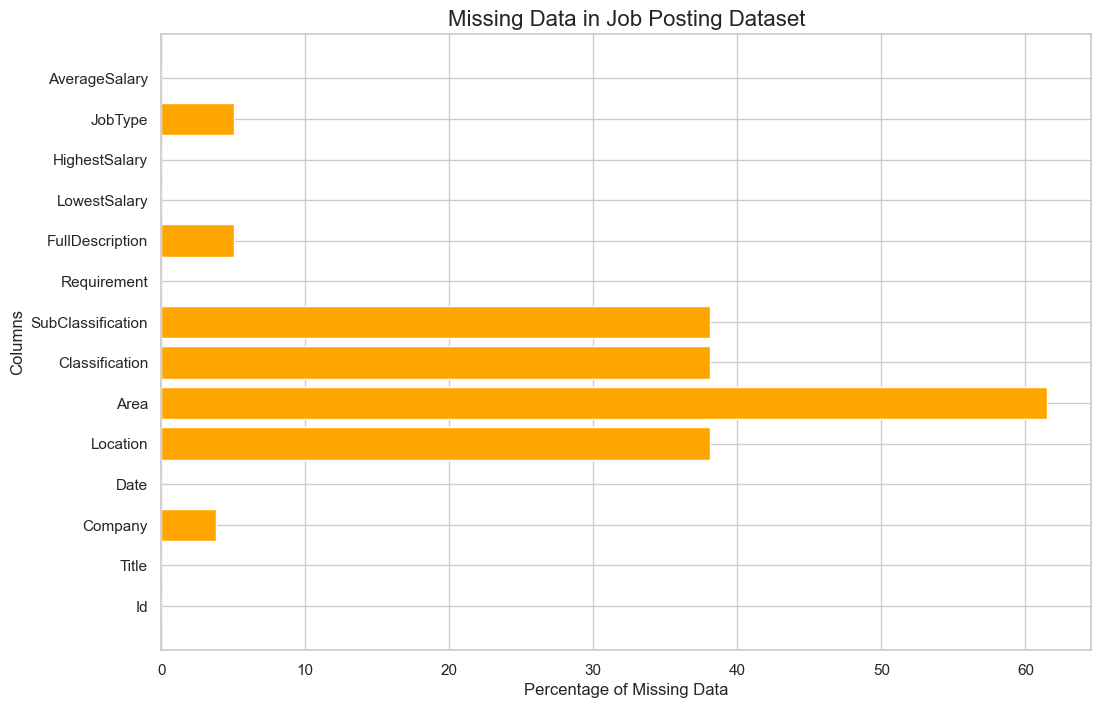

In [16]:
# calculate percentage of missing values for each column
missing_data = df.isnull().sum()
percent_missing = (missing_data / len(df)) * 100 # Convert to percentage

# create a bar plot to visualize missing data
plt.figure(figsize=(12, 8))
plt.barh(percent_missing.index, percent_missing.values, color='orange')


#Lables
plt.xlabel('Percentage of Missing Data', fontsize=12)
plt.ylabel('Columns', fontsize=12)
plt.title('Missing Data in Job Posting Dataset', fontsize=16)
plt.show()

In [17]:
# Save the cleaned and preprocessed dataset
df.to_csv("preprocessed_data.csv")

# Part 2 – Data Understanding [5 points]

### 1. Get the salary ranges using “AverageSalary”, the total jobs of each range and display them in the bar chart. (1 point)

In [18]:
colors = ['#1F77B4', '#AEC7E8', '#FF7F0E', '#FFBB78', '#2CA02C', '#98DF8A', '#B5CF6B', '#FF9896','#9467BD', '#C5B0D5', '#BCBD22']

In [19]:
#Group by average salary and count the numbers
averageSalaryDf = df.groupby("AverageSalary").count()
averageSalaryDf['AverageSalary'] = (averageSalaryDf.index*1000).astype(float).map('{:,.0f}'.format)
averageSalaryDf['Count'] = averageSalaryDf["Id"]
averageSalaryDf

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,AverageSalary,Count
AverageSalary,,,,,,,,,,,,,,,
15.0,62586,62586,59564,62586,38488,24364,38488,38488,62584,56043,62586,62586,56058,"15,000",62586
35.0,23471,23471,22292,23471,16391,9809,16391,16391,23471,22091,23471,23471,22093,"35,000",23471
45.0,34431,34431,32071,34431,21731,13259,21731,21731,34430,33575,34431,34431,33580,"45,000",34431
55.0,27018,27018,25670,27018,16552,10746,16552,16552,27017,26197,27018,27018,26213,"55,000",27018
65.0,28495,28495,27286,28495,18117,11390,18117,18117,28495,27542,28495,28495,27564,"65,000",28495
75.0,28706,28706,27788,28706,17047,10451,17047,17047,28706,27664,28706,28706,27668,"75,000",28706
90.0,24249,24249,23625,24249,12701,7562,12701,12701,24248,23587,24249,24249,23590,"90,000",24249
110.0,27669,27669,27146,27669,17133,10571,17133,17133,27667,26678,27669,27669,26679,"110,000",27669
135.0,24506,24506,24157,24506,14693,9476,14693,14693,24506,23602,24506,24506,23604,"135,000",24506


<function matplotlib.pyplot.show(close=None, block=None)>

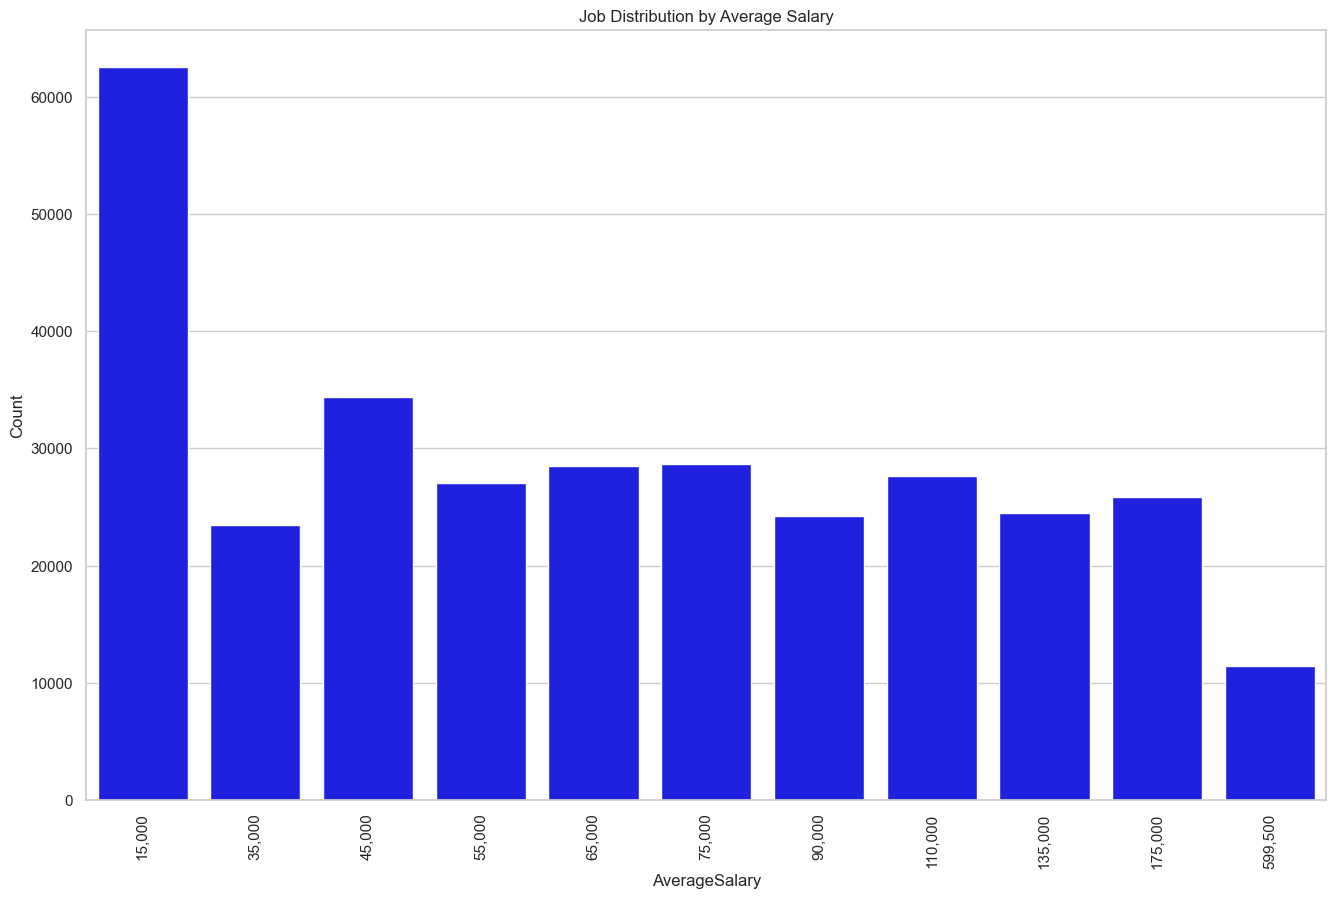

In [20]:
import matplotlib.pyplot as plt 
import seaborn as sns

plt.figure(figsize=(16, 10))
sns.barplot(data=averageSalaryDf, x="AverageSalary", y="Count", color="blue")
plt.title("Job Distribution by Average Salary")
plt.xticks(rotation=90)
plt.show

### 2. Display the list of job types and the number of jobs of each type using pie chart. (1 point)

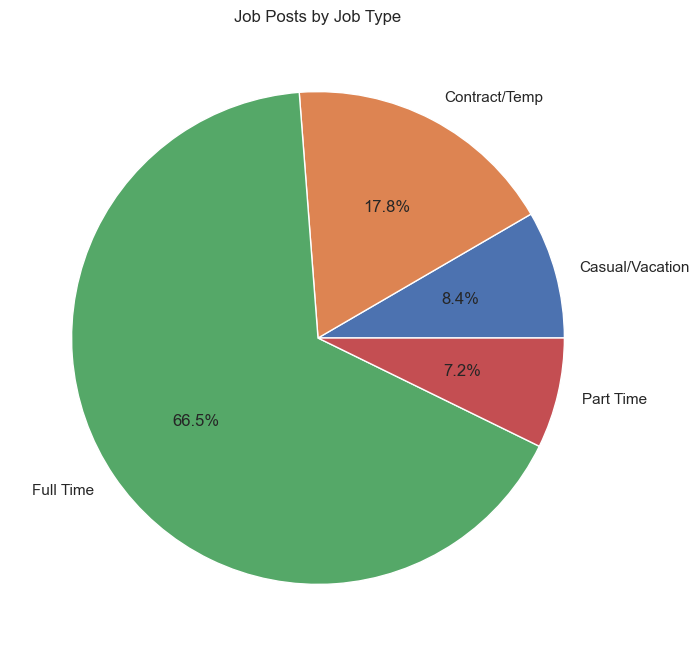

In [21]:
jobTypeDf = df.groupby("JobType").count()
jobTypeDf['Count']= jobTypeDf["Id"]
jobTypeDf['JobType']= jobTypeDf.index

plt.figure(figsize=(12,8))
plt.title("Job Posts by Job Type")

jobTypeDf['Count'].plot.pie(autopct="%.1f%%", ylabel='')

plt.show()

### 3. Display the list of job sectors and the number of jobs of each type using horizontal bar chart. (1 point)

Text(0, 0.5, 'Classification')

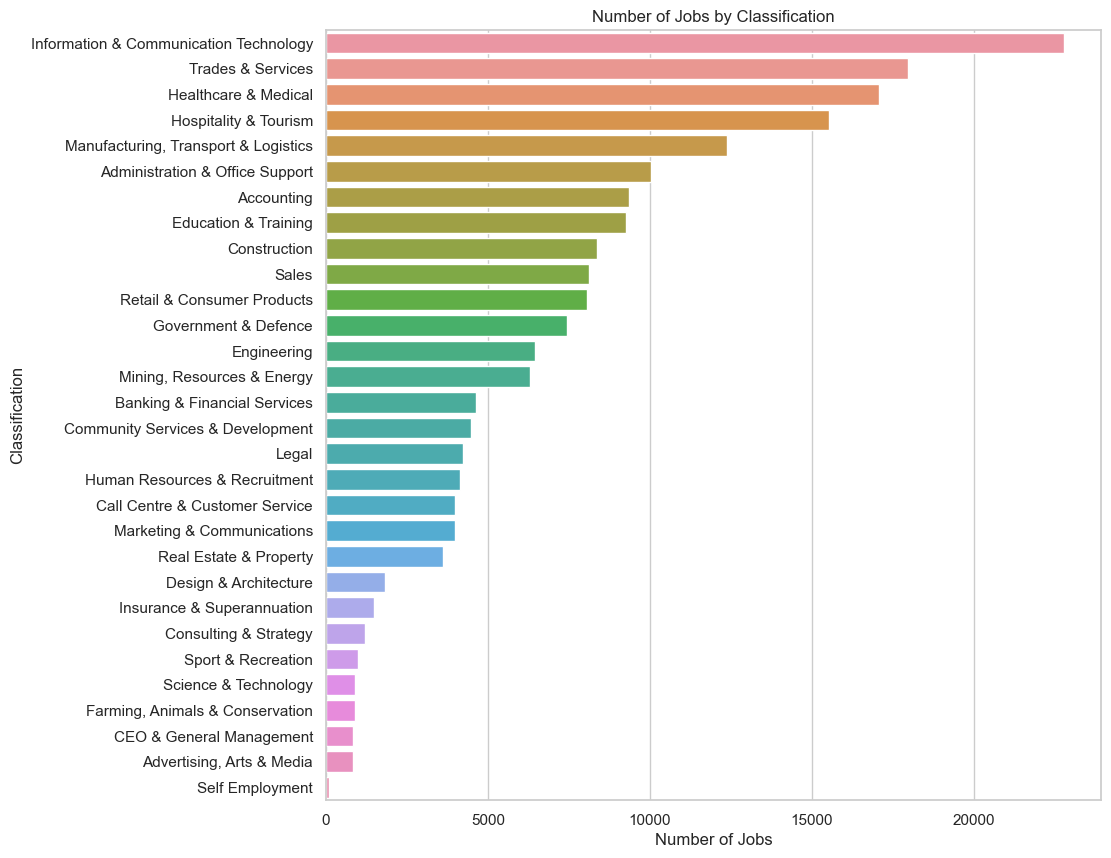

In [22]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.countplot(data=df, y="Classification", order = df['Classification'].value_counts().index)
ax.set_title("Number of Jobs by Classification")
ax.set_xlabel("Number of Jobs")
ax.set_ylabel("Classification")

### 4.Choose your favorite location. Visualize the market share of that location in pie chart. (1 point)

In [23]:
favorite_location = "Sydney"
location_df = df[df["Location"] == favorite_location]
location_df

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,AverageSalary
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN,15.0
4,37404308,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN,15.0
5,37404307,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Customer Service - Call Centre,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN,15.0
19,37404247,Assembler,Zoom Recruitment & Training,2018-10-07,Sydney,Parramatta & Western Suburbs,"Manufacturing, Transport & Logistics",Assembly & Process Work,"Our Client, located in Sydney West, has roles ...",NaN,0,30,NaN,15.0
27,37404311,Investment Accountant - NAB Asset Servicing,National Australia Bank,2018-10-07,Sydney,"CBD, Inner West & Eastern Suburbs",Banking & Financial Services,Analysis & Reporting,Entry level opportunity in Investment Accounti...,NaN,0,30,NaN,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197213,37828447,Construction & Major Projects - Commercial Man...,Sigma Executive,2018-11-29,Sydney,"CBD, Inner West & Eastern Suburbs",Legal,Construction Law,Join one of the world's leading infrastructure...,"<p style=""text-align:justify;""><strong>OUR CLI...",200,999,Full Time,599.5
197216,37828407,Head of Merchandise Planning,MyHouse,2018-11-29,Sydney,"CBD, Inner West & Eastern Suburbs",Retail & Consumer Products,Planning,MyHouse is seeking an experienced Head of Merc...,"<p>MyHouse is a successful, family owned retai...",200,999,Full Time,599.5
197217,37828375,IT Project/ Program Manager - Banking,Illuminate Search & Consulting,2018-11-29,Sydney,"CBD, Inner West & Eastern Suburbs",Information & Communication Technology,Programme & Project Management,Ability to deliver a wide federated model,<ul>\n <li><strong>Work on a large ba...,200,999,Contract/Temp,599.5
197218,37828374,IT Test Analyst OR Senior IT Test Analyst,Paxus,2018-11-29,Sydney,"CBD, Inner West & Eastern Suburbs",Information & Communication Technology,Testing & Quality Assurance,Great opportunity for a IT Test Analyst/Senio...,<p>Leading financial sector is seeking an IT T...,200,999,Contract/Temp,599.5


<function matplotlib.pyplot.show(close=None, block=None)>

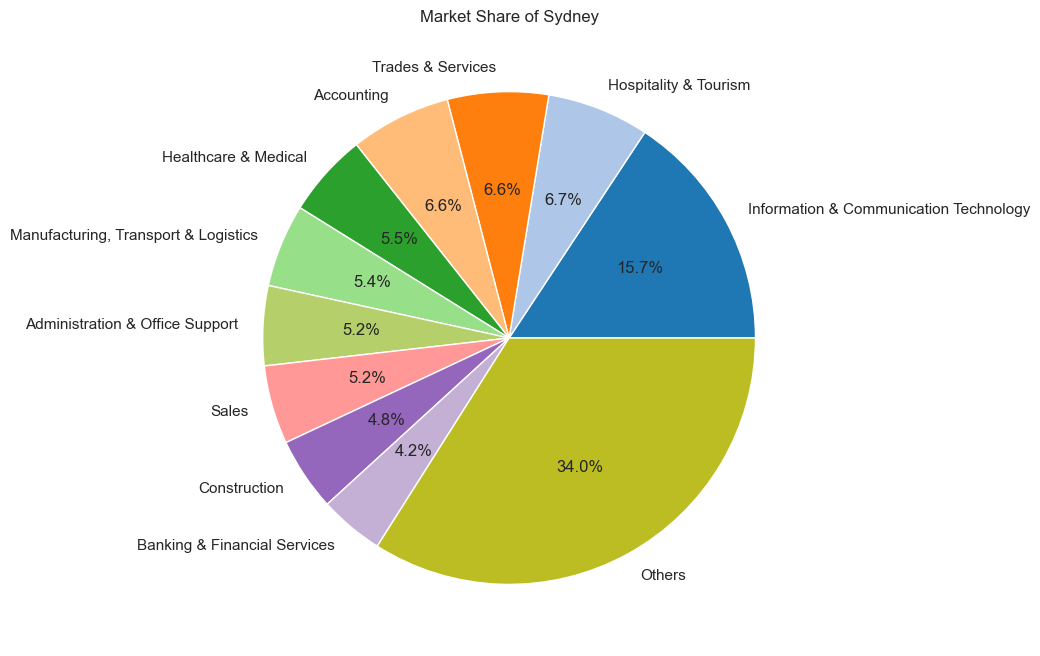

In [24]:
from matplotlib import cm

df_pie = location_df['Classification'].groupby(location_df['Classification'])

df_pie = df_pie.count().sort_values(ascending=False).to_frame()
df_pie['Value'] = df_pie["Classification"]
df_pie['Classification'] = df_pie.index
df2 = df_pie[:10].copy()
new_row = pd.DataFrame(data = {
    'Classification' : ['Others'],
    'Value' : [df_pie["Value"][10:].sum()]
})

df2 = pd.concat([df2, new_row])
df2.index = df2['Classification']
df2

plt.figure(figsize=(8,8))
plt.title("Market Share of Sydney")
df2['Value'].plot.pie(labels=df2["Classification"], colors=colors, autopct="%.1f%%", ylabel='')
plt.show

### 5.Can you find the salary distribution for the top 30 cities for the number of job postings? Visualize them in the boxplot chart. (1 point)

In [25]:
locationDf = df[df['Location'].isna()==False]
locationDf = locationDf.groupby('Location').count()
locationDf['Location'] = locationDf.index
locationDf['Count'] = locationDf["Id"]
locationDf.sort_values("Count", ascending=False, inplace=True)
locationDf

,Id,Title,Company,Date,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,AverageSalary,Location,Count
Location,,,,,,,,,,,,,,,
Sydney,60729,60729,58884,60729,53746,60729,60729,60729,57427,60729,60729,57441,60729,Sydney,60729
Melbourne,46656,46656,44907,46656,41268,46656,46656,46652,43804,46656,46656,43810,46656,Melbourne,46656
Brisbane,21455,21455,20601,21455,17403,21455,21455,21455,20207,21455,21455,20214,21455,Brisbane,21455
Perth,13192,13192,12760,13192,10165,13192,13192,13192,12282,13192,13192,12293,13192,Perth,13192
Adelaide,6650,6650,6300,6650,0,6650,6650,6650,6311,6650,6650,6312,6650,Adelaide,6650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yorke Peninsula & Clare Valley,96,96,94,96,0,96,96,96,90,96,96,90,96,Yorke Peninsula & Clare Valley,96
"Tumut, Snowy & Monaro",86,86,85,86,0,86,86,86,83,86,86,83,86,"Tumut, Snowy & Monaro",86
Somerset & Lockyer,65,65,63,65,0,65,65,65,64,65,65,64,65,Somerset & Lockyer,65


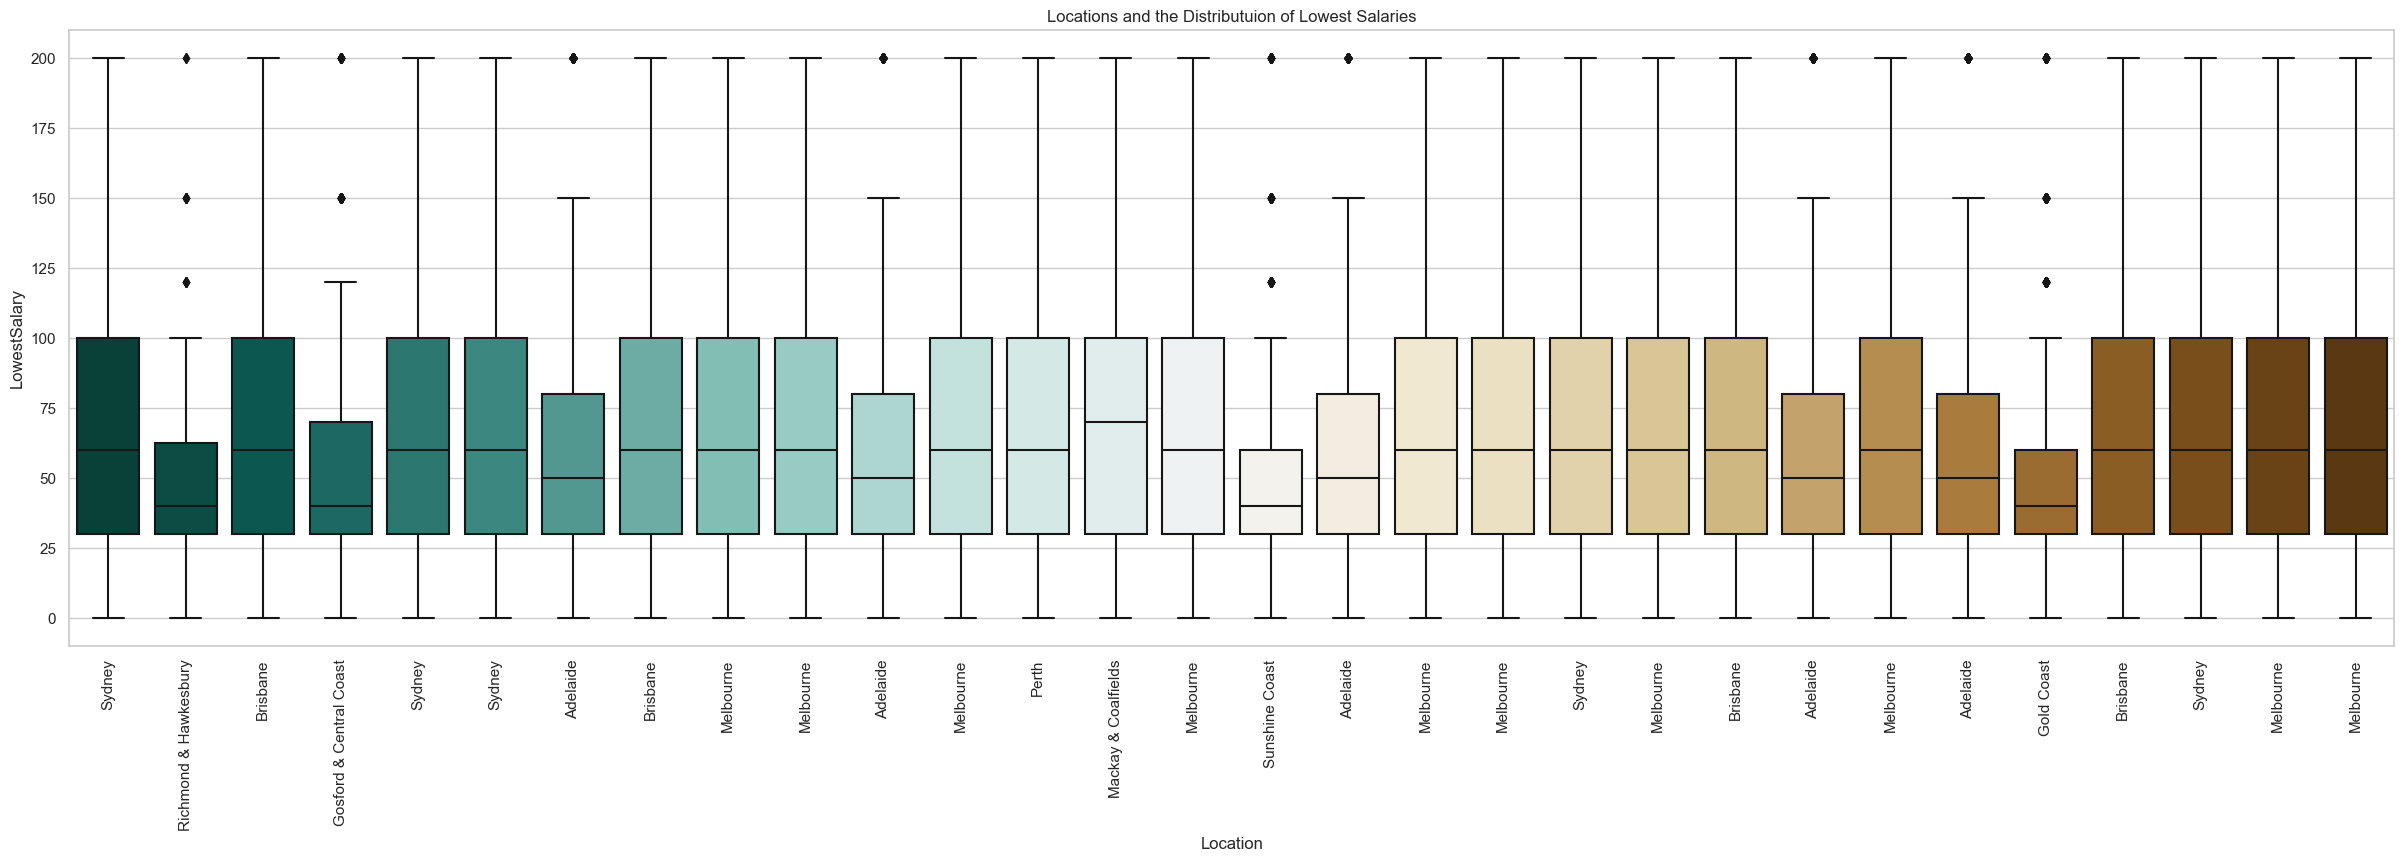

In [26]:
plt.figure(figsize = (30,8))
sns.boxplot(
    data=df,
    x="Location",
    y="LowestSalary",
    order=df["Location"][:30],
    palette=sns.color_palette("BrBG_r", n_colors=30)
)
plt.title("Locations and the Distributuion of Lowest Salaries")
plt.xticks(rotation=90)
plt.show()

# Part 3 - Data Analysis and Visualisation

## Analyse by Comparison

**Choose your two favourite cities/locations. We will explore the difference between them by answering the following questions:**

In [27]:
favorite_loc = "Sydney"
loc_df = df[df["Location"] == favorite_loc]
loc_df

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,AverageSalary
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN,15.0
4,37404308,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN,15.0
5,37404307,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Customer Service - Call Centre,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN,15.0
19,37404247,Assembler,Zoom Recruitment & Training,2018-10-07,Sydney,Parramatta & Western Suburbs,"Manufacturing, Transport & Logistics",Assembly & Process Work,"Our Client, located in Sydney West, has roles ...",NaN,0,30,NaN,15.0
27,37404311,Investment Accountant - NAB Asset Servicing,National Australia Bank,2018-10-07,Sydney,"CBD, Inner West & Eastern Suburbs",Banking & Financial Services,Analysis & Reporting,Entry level opportunity in Investment Accounti...,NaN,0,30,NaN,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197213,37828447,Construction & Major Projects - Commercial Man...,Sigma Executive,2018-11-29,Sydney,"CBD, Inner West & Eastern Suburbs",Legal,Construction Law,Join one of the world's leading infrastructure...,"<p style=""text-align:justify;""><strong>OUR CLI...",200,999,Full Time,599.5
197216,37828407,Head of Merchandise Planning,MyHouse,2018-11-29,Sydney,"CBD, Inner West & Eastern Suburbs",Retail & Consumer Products,Planning,MyHouse is seeking an experienced Head of Merc...,"<p>MyHouse is a successful, family owned retai...",200,999,Full Time,599.5
197217,37828375,IT Project/ Program Manager - Banking,Illuminate Search & Consulting,2018-11-29,Sydney,"CBD, Inner West & Eastern Suburbs",Information & Communication Technology,Programme & Project Management,Ability to deliver a wide federated model,<ul>\n <li><strong>Work on a large ba...,200,999,Contract/Temp,599.5
197218,37828374,IT Test Analyst OR Senior IT Test Analyst,Paxus,2018-11-29,Sydney,"CBD, Inner West & Eastern Suburbs",Information & Communication Technology,Testing & Quality Assurance,Great opportunity for a IT Test Analyst/Senio...,<p>Leading financial sector is seeking an IT T...,200,999,Contract/Temp,599.5


In [28]:
favorite_loc2 = "Brisbane"
loc_df2 = df[df["Location"] == favorite_loc2]
loc_df2

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,AverageSalary
2,37404356,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,NaN,15.0
7,37404350,Casual Café All-rounder in Woolloongabba,Jora Local,2018-10-07,Brisbane,CBD & Inner Suburbs,Hospitality & Tourism,Waiting Staff,A cafe in Woolloongabba is seeking a casual Ca...,NaN,0,30,NaN,15.0
21,37404239,Casual Barista in Murarrie,Jora Local,2018-10-07,Brisbane,CBD & Inner Suburbs,Hospitality & Tourism,Bar & Beverage Staff,A cafe in Murarrie is seeking a casual Barista...,NaN,0,30,NaN,15.0
26,37404396,Clinical Document Processing and Quality Assur...,West Moreton Hospital and Health Service,2018-10-07,Brisbane,Western Suburbs & Ipswich,Administration & Office Support,Records Management & Document Control,administrative and systems support in relation...,NaN,0,30,NaN,15.0
40,37404400,Project Officer,Metro South Health,2018-10-07,Brisbane,NaN,Administration & Office Support,Other,Asset and Infrastructure Services are looking ...,NaN,0,30,NaN,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197172,37829885,Efficiency Lead - Loans and Mortgages $180k + ...,FourQuarters Recruitment,2018-11-29,Brisbane,CBD & Inner Suburbs,Information & Communication Technology,Other,Join a major retail bank Transform Loan and Mo...,<strong>Efficiency Lead - Loans and Mortgages ...,200,999,Full Time,599.5
197174,37829862,Software Developer,Recon Solutions,2018-11-29,Brisbane,CBD & Inner Suburbs,Information & Communication Technology,Developers/Programmers,Requirement for a number of Software Developer...,We currently have an urgent requirement for a ...,200,999,Contract/Temp,599.5
197196,37828958,Chief Financial Officer & Company Secretary,Randstad - Accounting,2018-11-29,Brisbane,Southern Suburbs & Logan,Accounting,Company Secretaries,CFO & Company Secretary,"<p style=""text-align:center;""><strong>High pro...",200,999,Full Time,599.5
197219,37828361,Medical Officer,Coal Services Pty Ltd,2018-11-29,Brisbane,NaN,Healthcare & Medical,General Practitioners,Coal Services Health are looking for a Medical...,<p>&nbsp;</p>\n <ul>\n <li><st...,200,999,Full Time,599.5


### 1. Which city has more jobs? How many jobs of each type (casual, fulltime, etc.) are there in each city?

In [29]:
print("Number of Jobs in Sydney:", len(loc_df)) 
print("Number of Jobs in Brisbane:", len(loc_df2))

Number of Jobs in Sydney: 60729
Number of Jobs in Brisbane: 21455


Sydney has more jobs.

In [30]:
loc_df.groupby("JobType").count()

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,AverageSalary
JobType,,,,,,,,,,,,,
Casual/Vacation,3017,3017,2860,3017,3017,2858,3017,3017,3017,3016,3017,3017,3017
Contract/Temp,10989,10989,10841,10989,10989,9599,10989,10989,10989,10989,10989,10989,10989
Full Time,40586,40586,39224,40586,40586,35680,40586,40586,40586,40573,40586,40586,40586
Part Time,2849,2849,2723,2849,2849,2672,2849,2849,2849,2849,2849,2849,2849


In Sydney there are:
* 3017 Casual/Vacation jobs
* 10989 Contract/Temp jobs
* 40586 Full Time jobs
* 2849 Part Time jobs

In [31]:
loc_df2.groupby("JobType").count()

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,AverageSalary
JobType,,,,,,,,,,,,,
Casual/Vacation,1886,1886,1704,1886,1886,1686,1886,1886,1886,1884,1886,1886,1886
Contract/Temp,4115,4115,4078,4115,4115,3217,4115,4115,4115,4115,4115,4115,4115
Full Time,12997,12997,12451,12997,12997,10398,12997,12997,12997,12992,12997,12997,12997
Part Time,1216,1216,1148,1216,1216,1105,1216,1216,1216,1216,1216,1216,1216


In Brisbane there are:
* 1886 Casual/Vacation jobs
* 4115 Contract/Temp jobs
* 12997 Full Time jobs
* 1216 Part Time jobs

### 2. In each city, which are the top 5 job sectors? How many jobs are there in each sector?

In [32]:
#Top 5 job sectors in Sydney and number of jobs in each sector
syd = loc_df.groupby('Classification').size().sort_values(ascending=False).head(5)
syd

Classification
Information & Communication Technology    9543
Hospitality & Tourism                     4071
Trades & Services                         4023
Accounting                                4008
Healthcare & Medical                      3335
dtype: int64

In [33]:
#Top 5 job sectors in Melbourne and number of jobs in each sector
bris = loc_df2.groupby('Classification').size().sort_values(ascending=False).head(5)
bris

Classification
Information & Communication Technology    2766
Trades & Services                         1992
Healthcare & Medical                      1823
Manufacturing, Transport & Logistics      1667
Hospitality & Tourism                     1334
dtype: int64

### 3. Visualise the top 5 job sectors in a pie chart for each city.*

<function matplotlib.pyplot.show(close=None, block=None)>

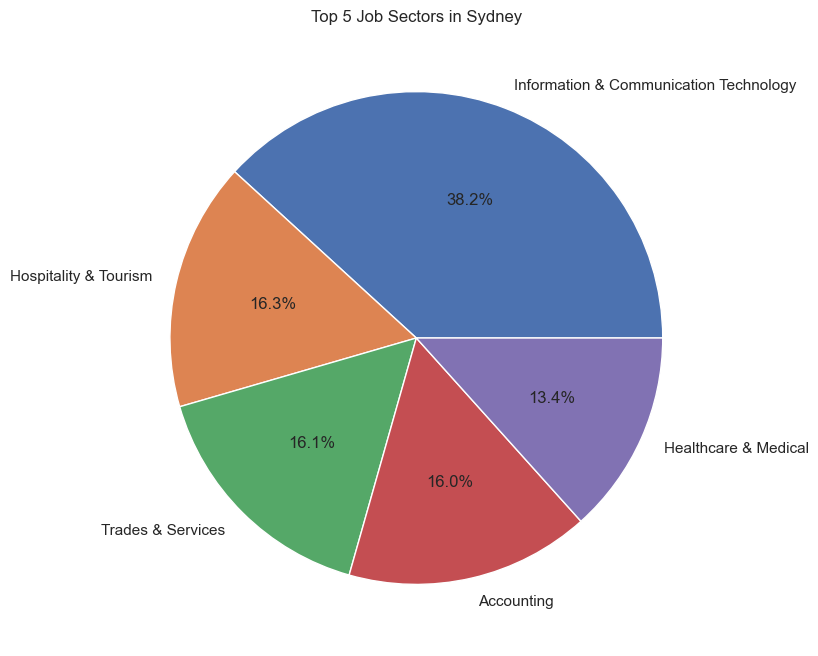

In [34]:
plt.figure(figsize=(12,8))
plt.title("Top 5 Job Sectors in Sydney")
syd.plot.pie(autopct='%.1f%%')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

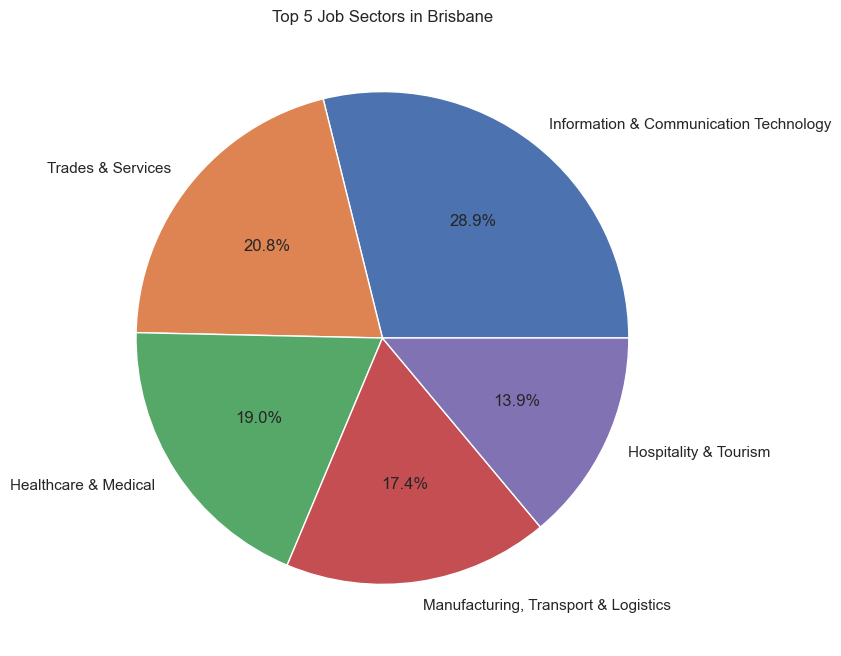

In [35]:
plt.figure(figsize=(12,8))
plt.title("Top 5 Job Sectors in Brisbane")
bris.plot.pie(autopct='%.1f%%')
plt.show

### 4. In each city, list the job salary range with the corresponding number of jobs. Which city is more well-paid?

In [36]:
#Salary range with number of jobs for Sydney
print("\nSydeny Salary Ranges and Their Total Job Postings:")
print(loc_df.groupby(["LowestSalary", "HighestSalary"])["Id"].count()) # Group data by LowestSalary and HighestSalary then count each Id value


Sydeny Salary Ranges and Their Total Job Postings:
LowestSalary  HighestSalary
0             30               11740
30            40                3967
40            50                5369
50            60                4859
60            70                5286
70            80                5029
80            100               3738
100           120               5578
120           150               5703
150           200               6270
200           999               3190
Name: Id, dtype: int64


In [37]:
#Salary range with number of jobs for Melbourne
print("\nBrisbane Salary Ranges and Their Total Job Postings:")
print(loc_df2.groupby(["LowestSalary", "HighestSalary"])["Id"].count()) # Group data by LowestSalary and HighestSalary then count each Id value


Brisbane Salary Ranges and Their Total Job Postings:
LowestSalary  HighestSalary
0             30               4077
30            40               1565
40            50               2734
50            60               1933
60            70               2032
70            80               1799
80            100              1327
100           120              1934
120           150              1462
150           200              1612
200           999               980
Name: Id, dtype: int64


From the findings above, it can be said that Sydney is more well paid as there is a larger concentration of job postings in the higher salary range. This can be clearly seen in the salary range of the lowest being 200 and highest being 999, Brisbane only has 980 whilst Sydney has 3190, judging from thins Sydney offers more jobs with a higher salary, and it can be deduced that it is the city that is more well-paid.

### 5. List the top 5 companies in each city. Which sectors do they belong to?

In [38]:
#Top 5 companies in Sydney and sector they belong to
loc_df.groupby(["Company", "Classification"])["Id"].size().sort_values(ascending=False).head(5)

Company                                  Classification                        
Jora Local                               Hospitality & Tourism                     1879
Paxus                                    Information & Communication Technology     346
Design & Build                           Construction                               331
Hays Accountancy & Finance               Accounting                                 294
Gough Property & Real Estate Recruiters  Real Estate & Property                     278
Name: Id, dtype: int64

In [39]:
#Top 5 companies in Brisbane and sector they belong to
loc_df2.groupby(["Company", "Classification"])["Id"].size().sort_values(ascending=False).head(5)

Company                       Classification                        
Jora Local                    Hospitality & Tourism                     306
Paxus                         Information & Communication Technology    170
The University of Queensland  Education & Training                      164
Hudson                        Information & Communication Technology    158
Exclaim IT                    Information & Communication Technology    138
Name: Id, dtype: int64

### 6. Between 2 cities, which do you think is better for employees? Explain your choice.*

Based on the analysis and visualisations conducted above between the two cities, Sydney looks to be the better city for employees. Firstly, Sydney has 39,274 more number of jobs than Brisbane, moreover out of these jobs, Sydney offers more jobs which are full-time employment, menaing a more steady income for employees. In relation to income, it can be said that Sydney is the city that is better paid, seeing that the highest salary range (200 to 999) has more job postings than that of Melbourne. Therefore, it can be concluded that between the two cities of Sydney and Brisbane, Sydney is better for employees.

## Analyse by Time


### 1. Visualise the number of job posts by month.

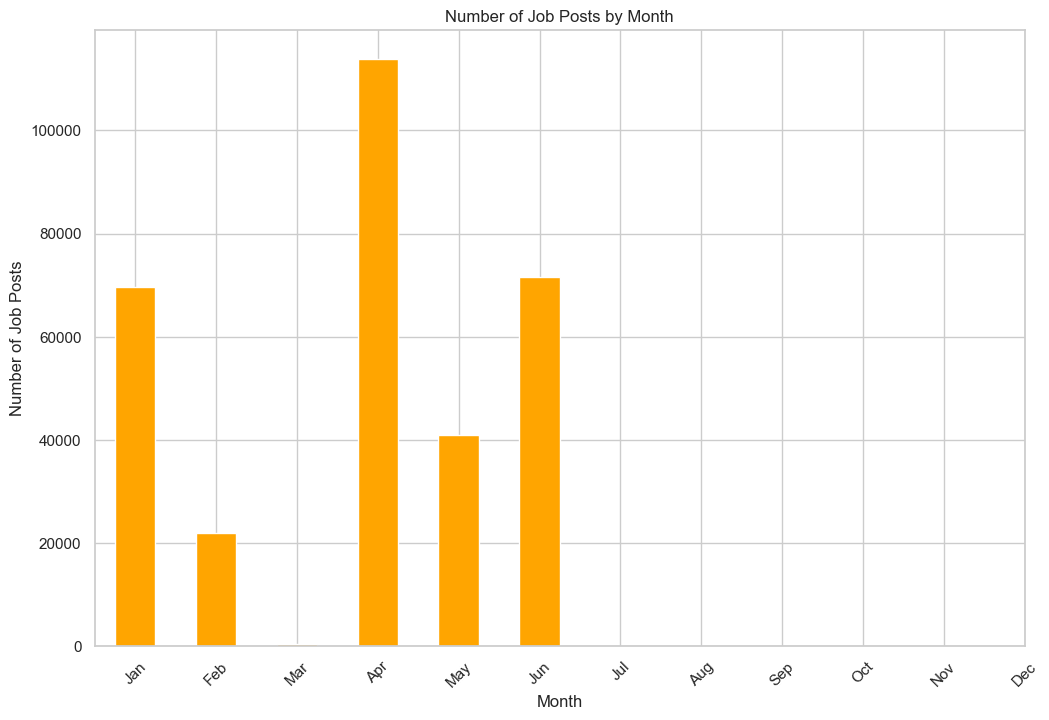

In [40]:
# Extract the month from the 'Date' column and create a new 'Month' column
df['Month'] = df['Date'].dt.month

# Group the data by the 'Month' column and count the number of job posts for each month
monthly_job_posts = df.groupby('Month')['Id'].count()

# Plot the number of job posts by month
monthly_job_posts.plot(kind='bar',figsize=(12, 8), color='orange')
plt.title('Number of Job Posts by Month')
plt.xlabel('Month')
plt.ylabel('Number of Job Posts')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.show()


### 2. Visualise the number of job posts by day of the week.

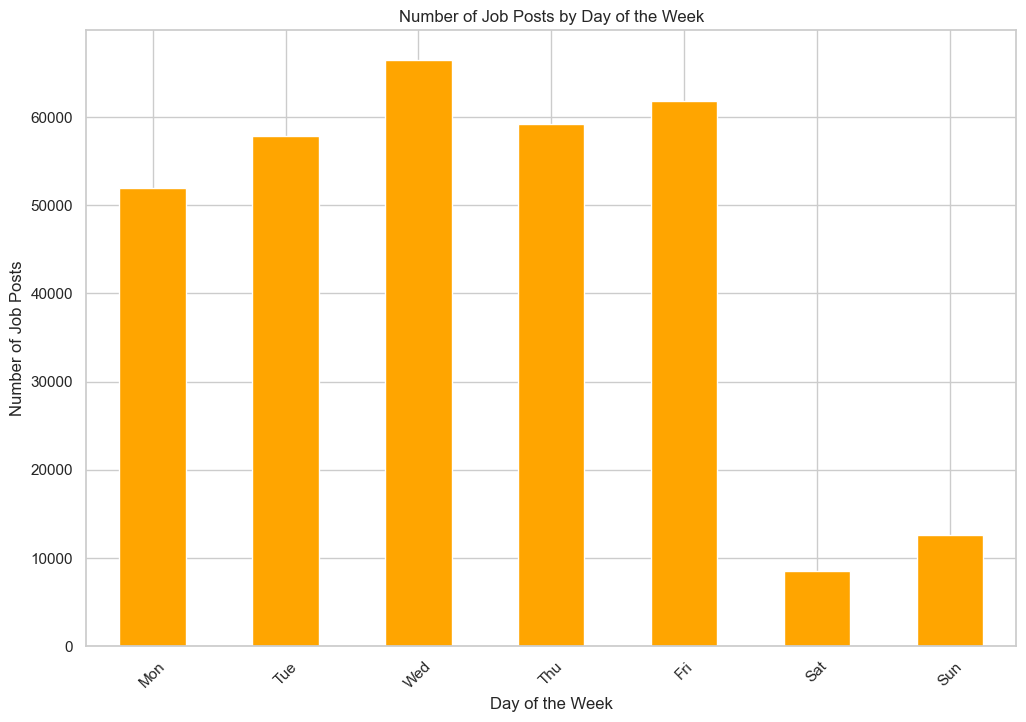

In [41]:
# Extract the day of the week from the 'Date' column and create a new 'DayOfWeek' column
df['DayOfWeek'] = df['Date'].dt.dayofweek

# Group the data by the 'DayOfWeek' column and count the number of job posts for each day
daily_job_posts = df.groupby('DayOfWeek')['Id'].count()

# Plot the number of job posts by day of the week
daily_job_posts.plot(kind='bar',figsize=(12, 8), color='orange')
plt.title('Number of Job Posts by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Job Posts')
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=45)
plt.show()


### 3. Visualise the number of job posts by day of the month.

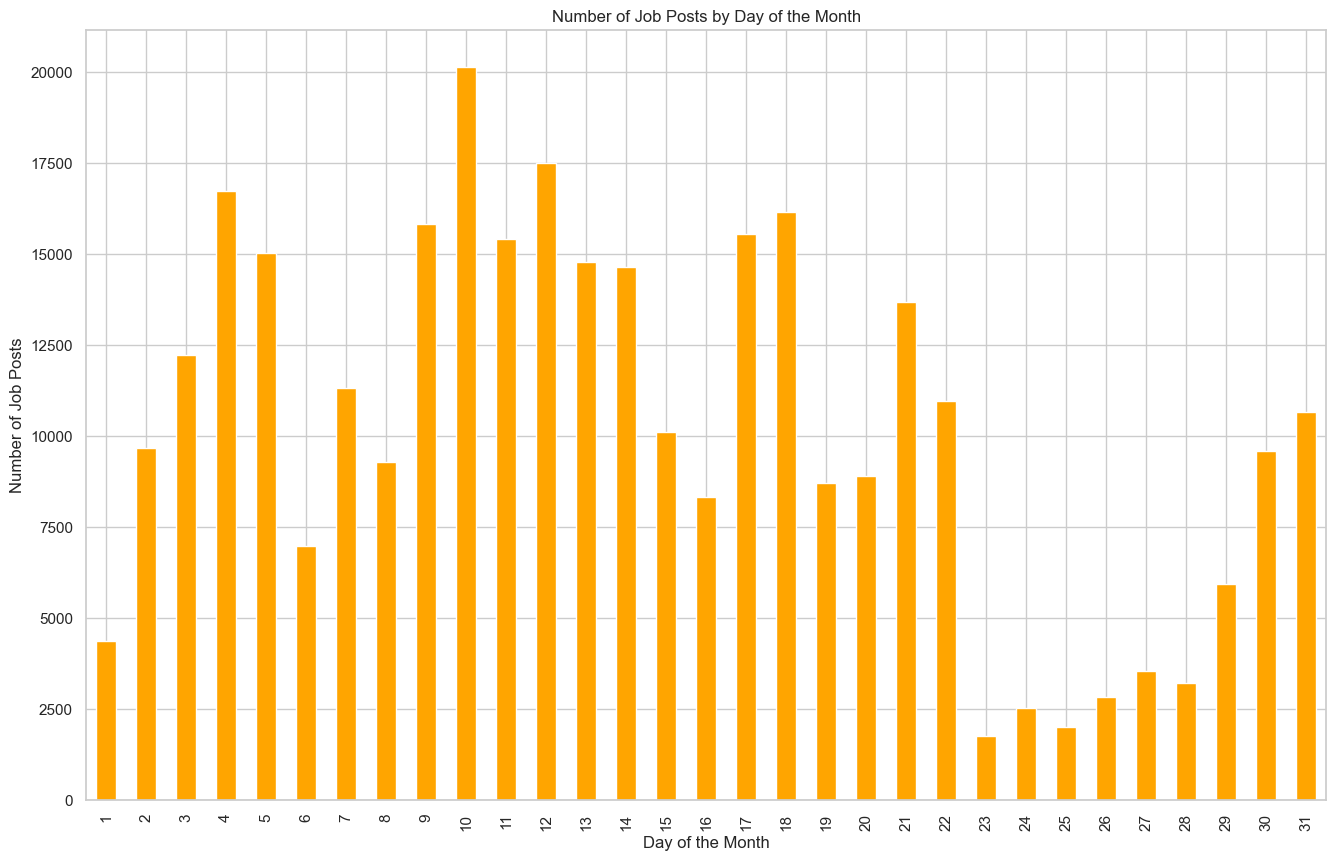

In [42]:
# Extract the day of the month from the 'Date' column and create a new 'DayOfMonth' column
df['DayOfMonth'] = df['Date'].dt.day

# Group the data by the 'DayOfMonth' column and count the number of job posts for each day
daily_job_posts = df.groupby('DayOfMonth')['Id'].count()

# Plot the number of job posts by day of the month
daily_job_posts.plot(kind='bar', figsize=(16, 10), color='orange')
plt.title('Number of Job Posts by Day of the Month')
plt.xlabel('Day of the Month')
plt.ylabel('Number of Job Posts')
plt.show()


### 4. Visualise trending job postings for the big cities.*

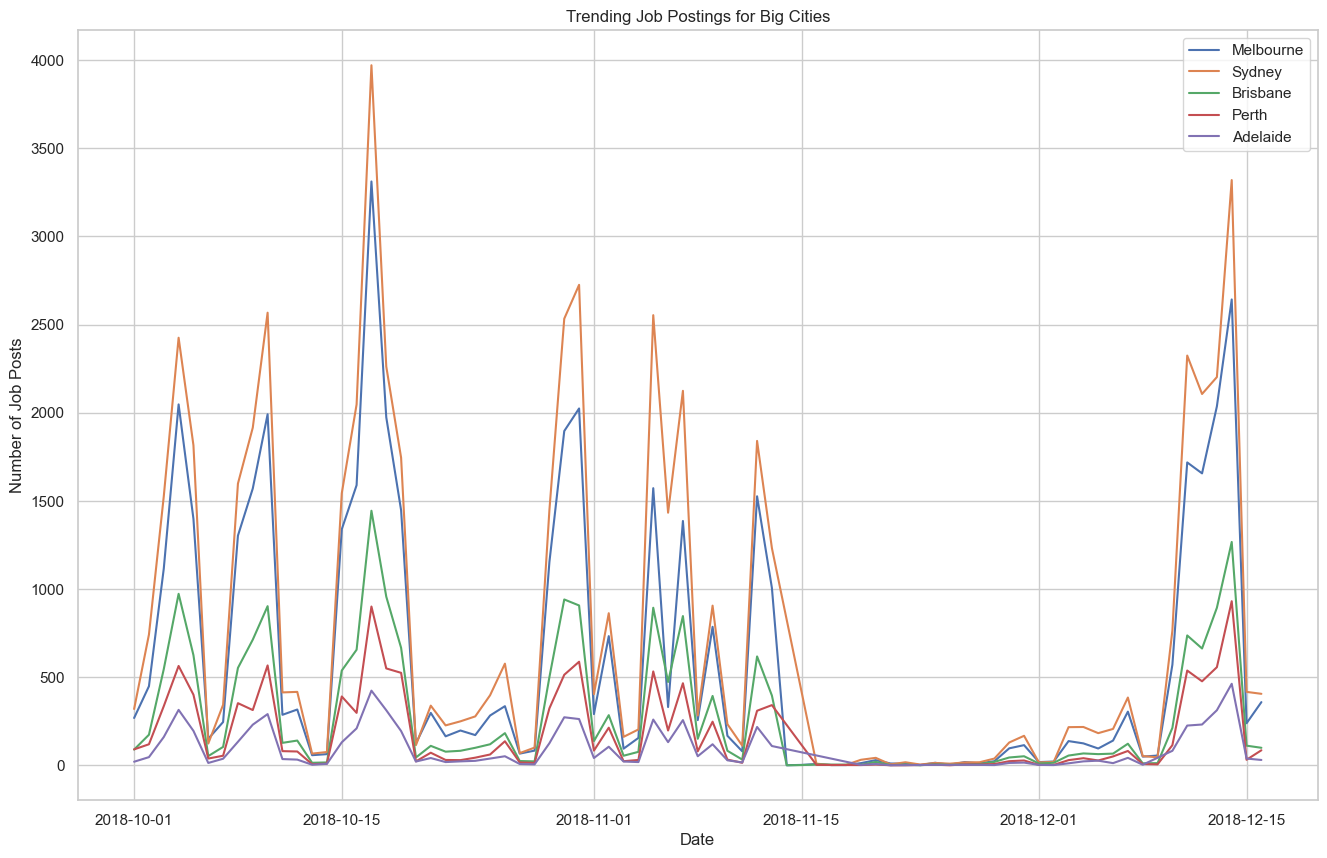

In [43]:
# Filter data for the big cities
big_cities = ["Melbourne", "Sydney", "Brisbane", "Perth", "Adelaide"]
city_df = df[df["Location"].isin(big_cities)]

# Group the data by 'Location' and 'Date' and count the number of job posts for each day and city
trending_job_posts = city_df.groupby(['Location', 'Date'])['Id'].count().reset_index()

# Plot the number of job posts by day for each city
fig, ax = plt.subplots(figsize=(16, 10))
for city in big_cities:
    city_data = trending_job_posts[trending_job_posts['Location'] == city]
    ax.plot(city_data['Date'].values, city_data['Id'].values, label=city)

plt.title('Trending Job Postings for Big Cities')
plt.xlabel('Date')
plt.ylabel('Number of Job Posts')
plt.legend()
plt.show()



### 5. Based on the above charts, provide your observation about the number of job posts over time. Give your own conclusion.

Based on the generated charts, we can make the following observations:

1. Number of Job Posts by Month: There might be some seasonality in job postings, with certain months having more job postings than others. This could be influenced by factors such as business cycles, budget allocation, or hiring strategy.

2. Number of Job Posts by Day of the Week: Job postings seem to be significantly higher on weekdays, with a peak around the middle of the week (Wednesday). This suggests that companies are more likely to post jobs during regular business days, possibly due to the availability of HR personnel and decision-makers.

3. Number of Job Posts by Day of the Month: The distribution of job posts across the days of the month appears relatively uniform, with some dips towards the end of the month. This could be because many companies might have a monthly cadence for posting new job opportunities or because they're synchronizing their hiring processes with monthly budgeting and planning cycles.

4. Trending Job Postings for Big Cities: The line chart shows trends in job postings for the five big cities - Melbourne, Sydney, Brisbane, Perth, and Adelaide. It's evident that Sydney and Melbourne consistently have the highest number of job postings compared to the other cities. This indicates that these two cities have the most significant job markets, possibly due to their larger populations, economic activity, and the presence of major companies.

In conclusion, the analysis of job postings over time reveals valuable insights into the job market dynamics. There may be some seasonality in job postings, with certain months having more job postings than others. Companies seem to prefer posting jobs during weekdays, especially mid-week, and the distribution of job postings across days of the month is relatively uniform with a slight dip towards the end of the month.

Furthermore, job postings are concentrated in the largest cities like Sydney and Melbourne, which have the most significant job markets. These observations can help job seekers, companies, and educational institutions understand the job market patterns and make informed decisions accordingly. For job seekers, these insights can guide them on when and where to focus their job search efforts. For companies, it can help them time their job postings to attract the right candidates. For educational institutions like Griffith University, it can assist in planning their program offerings and resources based on the job market trends in major cities.

## Forecasting and skill extractions

### Using moving average for 7 days and 30 days to predict the number of job postings and visualise them in line-chart.

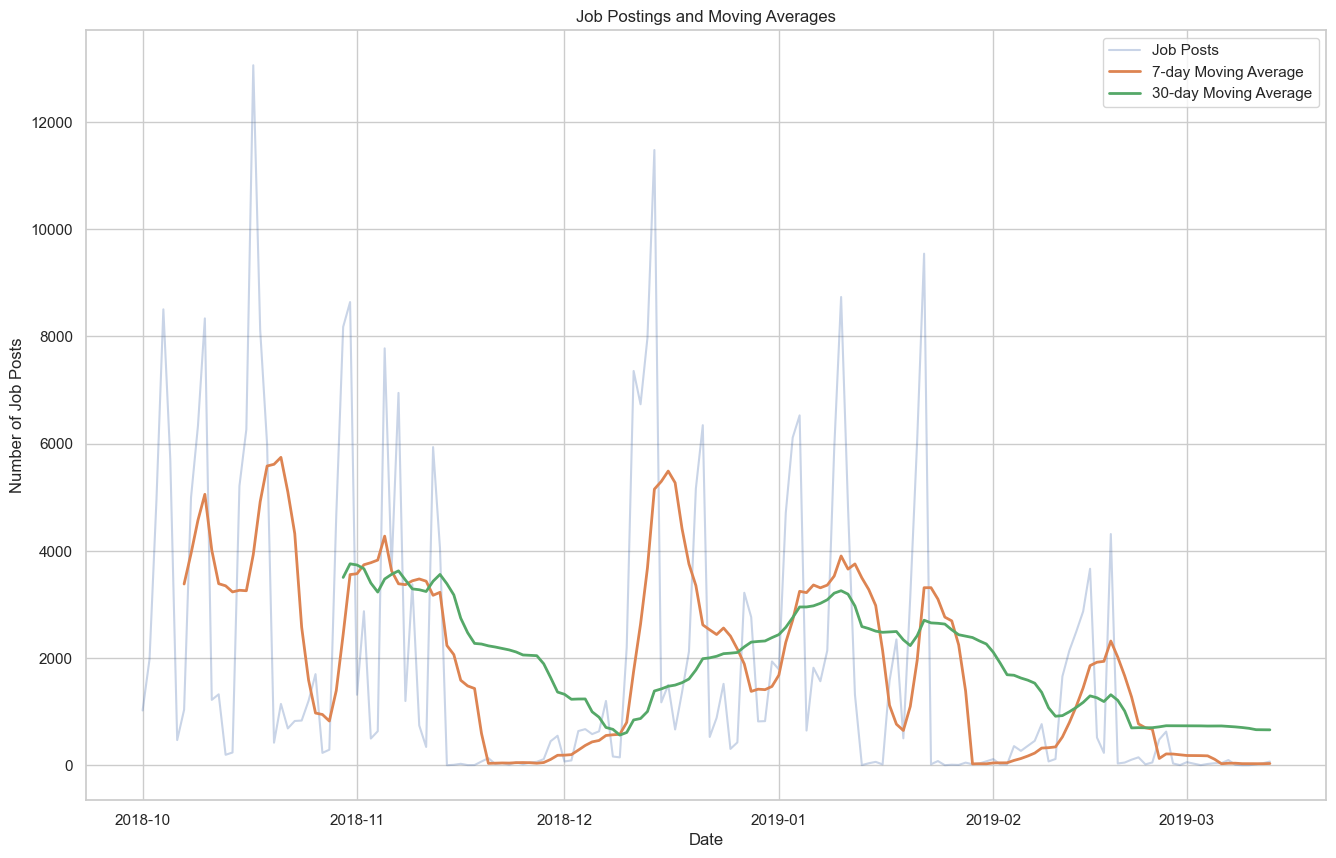

In [44]:
# Group the data by 'Date' and count the number of job posts for each day
daily_job_posts = df.groupby('Date')['Id'].count().reset_index()

# Calculate the 7-day and 30-day moving averages
daily_job_posts['7_day_moving_average'] = daily_job_posts['Id'].rolling(window=7).mean()
daily_job_posts['30_day_moving_average'] = daily_job_posts['Id'].rolling(window=30).mean()

# Plot the number of job posts and moving averages
fig, ax = plt.subplots(figsize=(16, 10))
ax.plot(np.array(daily_job_posts['Date']), np.array(daily_job_posts['Id']), label='Job Posts', alpha=0.3)
ax.plot(np.array(daily_job_posts['Date']), np.array(daily_job_posts['7_day_moving_average']), label='7-day Moving Average', linewidth=2)
ax.plot(np.array(daily_job_posts['Date']), np.array(daily_job_posts['30_day_moving_average']), label='30-day Moving Average', linewidth=2)

plt.title('Job Postings and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Number of Job Posts')
plt.legend()
plt.show()


### Which one creates a better prediction?

This code reads the CSV file, converts the 'Date' column to datetime format, groups the data by date, and calculates the 7-day and 30-day moving averages. It then plots a line chart showing the number of job posts and both moving averages. The moving averages help to smooth out short-term fluctuations and highlight longer-term trends in the data. By comparing the 7-day and 30-day moving averages, you can get an idea of weekly and monthly trends in job postings.

As for which moving average creates a better prediction, it depends on your specific use case and requirements. The 7-day moving average is more sensitive to short-term fluctuations and provides a smoother representation of the recent trend, while the 30-day moving average is less sensitive to short-term fluctuations and provides a more stable representation of the long-term trend.

In general, a shorter moving average window, like the 7-day one, will be better for predicting short-term trends, whereas a longer moving average window, like the 30-day one, will be better for predicting long-term trends. It's essential to choose the right window size based on your specific needs and the level of noise in the data.

### Choose your favourite job sector/sub-sector, then use TF/IDF to extract important keywords. Visualise them in word cloud chart

Note: The word cloud chart doesn't show until the code is run

In [45]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from nltk.corpus import stopwords
import wordcloud

classifications = df['Classification'].dropna().unique()

custom_stopwords = ['store','join', 'looking', 'want', 'site', 'month', 'week', 'level', 'required', 'one', 'end', 'nsw',
                    'positions', 'make', 'across', 'take', 'key', 'large', 'based', 'melbourne', 'staff', 'australia',
                    'position', 'currently', 'full', 'projects', 'north', 'basis', 'next', '12', 'per', 'term', 'program',
                    'home', 'long' 'person', 'agency', 'apply', 'day', 'roles', 'within' 'perth', 'sydney',  'residential',
                    'years', '2019', 'market', 'data', 'exists', 'immediate', 'available', 'officer', 'needed', 'school',
                    'south', 'small', 'cbd', 'year', 'months', 'early', 'life', 'largest', '30', 'part', 'well', 'busy', 'cafe', 'restaurant']

stop_words = stopwords.words('english')
for word in custom_stopwords:
    stop_words.append(word)

In [46]:
def update(Classification="Construction"):
    requirements = df[df['Classification']==Classification]['Requirement'].dropna()
    original_documents = [x.strip() for x in requirements] 

    tfidf = TfidfVectorizer(analyzer='word', ngram_range=(1,1), min_df = 1, stop_words = stop_words, max_features=200)

    features = tfidf.fit(original_documents)
    corpus_tf_idf = tfidf.transform(original_documents) 

    sum_words = corpus_tf_idf.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in tfidf.vocabulary_.items()]
    words_freq_dict = {x: y for x,y in words_freq}
    words_freq_dict.items()
    #print(sorted(words_freq, key = lambda x: x[1], reverse=True)[:5])

    word_cloud = wordcloud.WordCloud(width=1280,height=720,background_color='white',colormap='viridis')
    word_cloud.generate_from_frequencies(words_freq_dict)

    plt.figure(figsize=(16,16))
    plt.imshow(word_cloud,interpolation='bilinear')
    plt.axis("off")
    plt.title('TF-IDF Analysis of Requirements', size=14)
    plt.show()
    
interact(update, Classification=classifications)

interactive(children=(Dropdown(description='Classification', index=23, options=('Retail & Consumer Products', …

<function __main__.update(Classification='Construction')>

# Part 4 - Discussion

# Scenario 1

In order to determine and recommend which major and the related subjects, will be best suited for Tom, an analysis on the current job market dataset will be taken. Salary ranges will be taken into consideration, along with location, in order to satisfy Toms requirements. 

To begin, the market share of the dataset must be analysed to narrow down the largest market share as of current. By determining the largest market share, this allows for understanding of which job sectors currently are the largest and therefore recommended to study in university to guarantee a job. In the whole of the dataset, Information and Communication Technology holds the largest market share with 15.7%, this provides us more insight as to which major can guarantee a job in Australia. However, Tom is wanting a job in his current state of Queensland. Thus, an analysis of the job sector in Brisbane will be analysed. In Brisbane it can be deduced that the top 5 job sectors are the following.

* Information and Communication Technology: 28.9%
* Trades and Services: 20.8%
* Healthcare and Medical: 19.0%
* Manufacturing, Transports and Logistics: 17.4%
* Hospitality and Tourism: 13.9%

From this, we can see that Information and Communication Technology have the highest job sector in Brisbane with 28.9%. In addition to this, through an analysis of the number of which job sector have the highest number of jobs available, categorised by job type (see below), we can see that the most available jobs belong to the Information and Communication Technology sector, with 1353 jobs that are contract/temp. Since Tom is looking for a job with an equal to or higher than income of 80K It can be assumed that Tom might be looking for a full-time job in order to create a steadier income. From this, the highest number of available jobs in Brisbane that are full-time is first Trades and Services with 1233 and after Information and Communication Technology with 1156. 

Moreover, an analysis has been conducted to view the number of which job sector have the highest number of jobs available, categorised by salary range (see below), to determine which would be appropriate for Toms want of a job with an equal to or higher than income of 80K. Out of the top 5 only 2 of them fit within Toms range of an income equal to or higher than 80K. The first being Information and Communication Technology with 714 jobs in the salary range of the lowest being 150K and highest being 200K. The second being also Information and Communication Technology with 458 jobs in the salary range of the lowest being 200K and 999K. 

We can therefore determine that the job sector that can guarantee Tom a job in his state of Queensland and with a good income of equal to or higher than 80K, is Information and Communication Technology. 

Thus, it can be recommended that Tom take a major related to Information and Communication Technology. This could be a degree in Bachelor of IT, Bachelor of Data Science or Bachelor of Compute Science. At Griffith University the major choices would be, Information Systems, Networks and Security and Software Development. Related subjects could be, Programming Principles, Software Technologies, Web Technologies, Data Management and Computer Systems and Networks. These subjects will give Tom further understanding of the field, and allow him to parttake in study that will further his knowledge in these areas. By undergoing this major and completing the related subjects, Tom is highly likely to be guaranteed a job in his chosen state with his desired income, due to the analysis taken in terms of number of jobs and the different categorisations. 

In [47]:
#Number of which job sector has the highest number of jobs available, categorised by job type
loc_df2.groupby(["JobType", "Classification"])["Id"].size().sort_values(ascending=False).head(10)

JobType        Classification                        
Contract/Temp  Information & Communication Technology    1353
Full Time      Trades & Services                         1233
               Information & Communication Technology    1156
               Healthcare & Medical                       993
               Manufacturing, Transport & Logistics       859
               Sales                                      750
               Accounting                                 741
               Engineering                                712
               Education & Training                       687
               Construction                               669
Name: Id, dtype: int64

In [48]:
#Number of which job sector has the highest number of jobs available, categorised by salary range
loc_df2.groupby(["LowestSalary", "HighestSalary", "Classification"])["Id"].count().sort_values(ascending=False).head(10)

LowestSalary  HighestSalary  Classification                        
150           200            Information & Communication Technology    714
200           999            Information & Communication Technology    458
0             30             Information & Communication Technology    447
40            50             Manufacturing, Transport & Logistics      433
0             30             Trades & Services                         416
30            40             Hospitality & Tourism                     391
40            50             Hospitality & Tourism                     358
120           150            Information & Communication Technology    343
0             30             Manufacturing, Transport & Logistics      341
100           120            Information & Communication Technology    340
Name: Id, dtype: int64

# Scenario 2: 

To provide recommendations on which majors should be extended and which majors should be reduced at Griffith University based on job market data, we will analyze the job market trends in various sectors and sub-sectors related to those majors. The goal is to identify the industries with a higher demand for professionals and those with a lower demand. This will help Griffith University tailor their program offerings to better align with the job market needs, thereby enhancing the employability of their graduates.

Firstly, let's establish the number of job postings for each job sector or classification in the dataset. We'll then find the top 5 sectors with the highest number of job postings. We can then look at the number of job postings for each sub-sector or sub-classification within these top sectors to find the most in-demand roles. We can also take salary ranges into account to ensure we're recommending fields that not only have a high number of job postings, but also offer good salary prospects.


In [49]:
# Top 5 sectors with the highest number of job postings
top_sectors = df["Classification"].value_counts().nlargest(5)

# For each top sector, find the top 3 sub-sectors with the highest number of job postings
for sector in top_sectors.index:
    print("\nTop Sub-sectors for:", sector)
    print(df[df["Classification"] == sector]["SubClassification"].value_counts().nlargest(3))

# Average salary range for each top sector
for sector in top_sectors.index:
    print("\nAverage Salary Range for:", sector)
    avg_lowest_salary = df[df["Classification"] == sector]["LowestSalary"].mean()
    avg_highest_salary = df[df["Classification"] == sector]["HighestSalary"].mean()
    print("Lowest: $", round(avg_lowest_salary, 2), "K")
    print("Highest: $", round(avg_highest_salary, 2), "K")



Top Sub-sectors for: Information & Communication Technology
Developers/Programmers            4210
Business/Systems Analysts         2982
Programme & Project Management    2413
Name: SubClassification, dtype: int64

Top Sub-sectors for: Trades & Services
Automotive Trades    3261
Electricians         1782
Labourers            1535
Name: SubClassification, dtype: int64

Top Sub-sectors for: Healthcare & Medical
Nursing - Aged Care                   2126
Physiotherapy, OT & Rehabilitation    1820
General Practitioners                 1261
Name: SubClassification, dtype: int64

Top Sub-sectors for: Hospitality & Tourism
Chefs/Cooks             4596
Waiting Staff           2864
Bar & Beverage Staff    2586
Name: SubClassification, dtype: int64

Top Sub-sectors for: Manufacturing, Transport & Logistics
Warehousing, Storage & Distribution    3636
Road Transport                         1761
Assembly & Process Work                 955
Name: SubClassification, dtype: int64

Average Salary Rang

This code provides insights into the top sectors and sub-sectors with the highest job postings, as well as the average salary ranges for each sector. It helps identify the most popular job sectors, the specific sub-sectors within them, and the salary expectations within those sectors.

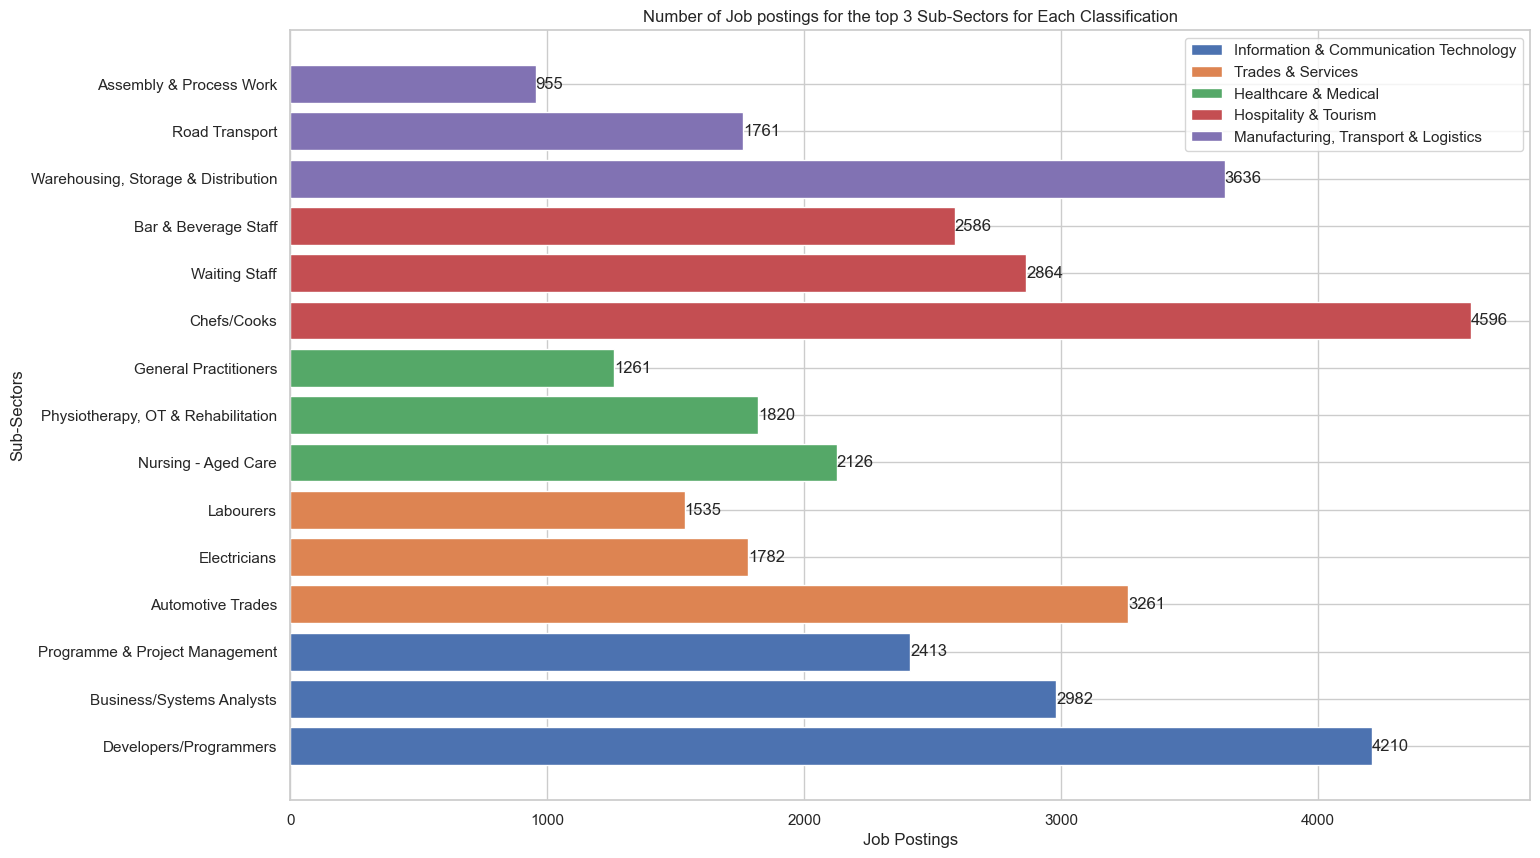

In [50]:
# Define the top 5 classifications
top_classifications = ['Information & Communication Technology', 'Trades & Services', 'Healthcare & Medical',
                       'Hospitality & Tourism', 'Manufacturing, Transport & Logistics']

# Extract the top 3 subsectors for each classification
top_subsectors = {}
for classification in top_classifications:
    subsectors = df[df['Classification'] == classification]['SubClassification'].value_counts().head(3)
    top_subsectors[classification] = subsectors

# Plot the top 3 subsectors for each classification
plt.figure(figsize=(16, 10))
for i, classification in enumerate(top_classifications):
    subsector_counts = top_subsectors[classification]
    bars = plt.barh(subsector_counts.index, subsector_counts.values, label=classification)
    
    # Add text annotations to each bar
    for j, bar in enumerate(bars):
        plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, subsector_counts.values[j], ha='left', va='center')

plt.xlabel('Job Postings')
plt.ylabel('Sub-Sectors')
plt.title('Number of Job postings for the top 3 Sub-Sectors for Each Classification')
plt.legend()
plt.show()

The code above provides a nice visual representation of the top 3 sub-sectors for the top 5 classifications.

In [51]:
# Extract the lowest and highest salary ranges for each of the top 3 subsectors within each classification
salary_ranges = {}
for classification in top_classifications:
    subsectors = df[df['Classification'] == classification]['SubClassification'].value_counts().head(3).index
    classification_ranges = {}
    for subsector in subsectors:
        subsector_data = df[(df['Classification'] == classification) & (df['SubClassification'] == subsector)]
        lowest_salary = subsector_data['LowestSalary'].mean()
        highest_salary = subsector_data['HighestSalary'].mean()
        classification_ranges[subsector] = {'Lowest Salary': lowest_salary, 'Highest Salary': highest_salary}
    salary_ranges[classification] = classification_ranges

# Print the lowest and highest salary ranges for each of the top 3 subsectors within each classification
for classification in top_classifications:
    print(f"\nClassification: {classification}")
    classification_ranges = salary_ranges[classification]
    for subsector, ranges in classification_ranges.items():
        print(f"Sub-sector: {subsector}")
        print(f"Lowest Salary: {ranges['Lowest Salary']:.2f}K")
        print(f"Highest Salary: {ranges['Highest Salary']:.2f}K")


Classification: Information & Communication Technology
Sub-sector: Developers/Programmers
Lowest Salary: 106.20K
Highest Salary: 231.86K
Sub-sector: Business/Systems Analysts
Lowest Salary: 115.69K
Highest Salary: 279.86K
Sub-sector: Programme & Project Management
Lowest Salary: 128.65K
Highest Salary: 375.55K

Classification: Trades & Services
Sub-sector: Automotive Trades
Lowest Salary: 43.67K
Highest Salary: 60.16K
Sub-sector: Electricians
Lowest Salary: 55.54K
Highest Salary: 74.97K
Sub-sector: Labourers
Lowest Salary: 37.77K
Highest Salary: 52.42K

Classification: Healthcare & Medical
Sub-sector: Nursing - Aged Care
Lowest Salary: 53.05K
Highest Salary: 73.46K
Sub-sector: Physiotherapy, OT & Rehabilitation
Lowest Salary: 59.46K
Highest Salary: 88.95K
Sub-sector: General Practitioners
Lowest Salary: 154.46K
Highest Salary: 669.42K

Classification: Hospitality & Tourism
Sub-sector: Chefs/Cooks
Lowest Salary: 34.09K
Highest Salary: 48.62K
Sub-sector: Waiting Staff
Lowest Salary: 27.

Overall, this code allows us to analyze and print the lowest and highest salary ranges for the top 3 subsectors within each of the top 5 classifications. It provides insights into the salary expectations within specific subsectors and classifications, enabling further analysis of the job market and potential career paths. We can observe which sub-sector has the highest and lowest salary income:

#### Classification: Information & Communication Technology:
Sub-sector: 
* Highest salary: Programme & Project Management (375.55K)
* Lowest salary: Developers/Programmers (106.18K)

#### Classification: Trades & Services
Sub-sector: 
* Highest salary: Electricians (74.97K)
* Lowest salary: Labourers (37.75K)

#### Classification: Healthcare & Medical
Sub-sector: 
* Highest salary: General Practitioners (669.94K)
* Lowest salary: Nursing - Aged Care (53.03K)

#### Classification: Classification: Hospitality & Tourism
Sub-sector: 
* Highest salary: Chefs/Cooks (48.61K)
* Lowest salary: Waiting Staff (27.82K)

#### Classification: Manufacturing, Transport & Logistics
Sub-sector: 
* Highest salary: Road Transport (63.76K)
* Lowest salary: Assembly & Process Work (34.12K)

This method provides a very niche outcome for these specific sub-sectors and classification. The next method we can use the mean or averages values to get a more general perspective of the results.

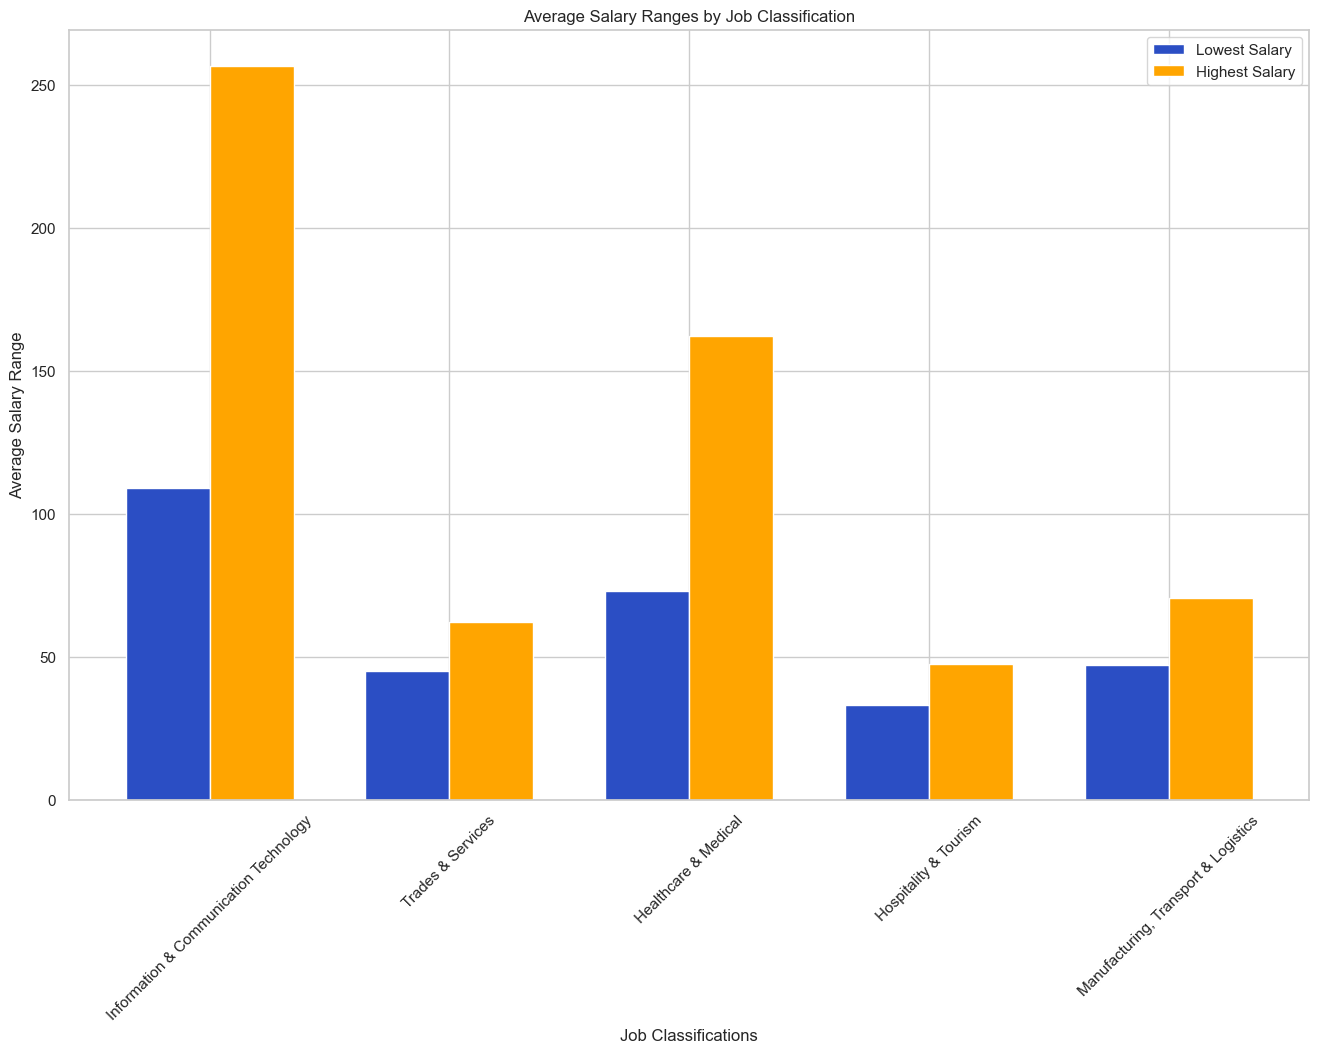

In [52]:
# Calculate average salary ranges for each job classification
classifications = ['Information & Communication Technology', 'Trades & Services', 'Healthcare & Medical',
                   'Hospitality & Tourism', 'Manufacturing, Transport & Logistics']
lowest_salaries = []
highest_salaries = []

for classification in classifications:
    classification_data = df[df['Classification'] == classification]
    lowest_salary = classification_data['LowestSalary'].mean()
    highest_salary = classification_data['HighestSalary'].mean()
    lowest_salaries.append(lowest_salary)
    highest_salaries.append(highest_salary)

# Set the width of each bar
bar_width = 0.35

# Set the x positions of the bars
x = np.arange(len(classifications))

# Plot the average salary ranges side by side
plt.figure(figsize=(16, 10))
plt.bar(x, lowest_salaries, width=bar_width, label='Lowest Salary', color='#2B4EC4')
plt.bar(x + bar_width, highest_salaries, width=bar_width, label='Highest Salary',color='orange')
plt.xlabel('Job Classifications')
plt.ylabel('Average Salary Range')
plt.title('Average Salary Ranges by Job Classification')
plt.legend()
plt.xticks(x + bar_width/2, classifications, rotation=45)


plt.show()

Overall, this code calculates and visualizes the average salary ranges for each job classification using bar plots, allowing for easy comparison of the average salary ranges across different job classifications. This gives us a much more accurate representation of the desparaties between low and high salaries as well and variance between each classifications.

### Summary

Based on the analysis of the job market data, we can recommend the following actions:

Extend Majors:

* Information & Communication Technology: This sector has the highest number of job postings, with Developers/Programmers, Business/Systems Analysts, and Programme & Project Management being the most in-demand roles. Moreover, it has the highest average salary range among the top sectors. Therefore, it's recommended to extend majors related to Software Development, Programming, Business Analysis, and Project Management.

* Healthcare & Medical: With the increasing need for healthcare services, there's a high demand for roles related to Nursing, Physiotherapy, OT & Rehabilitation, and General Practice. This sector also offers a good salary range. As such, extending majors in these areas could increase the employability of the graduates.

* Trades & Services: There's a considerable demand for Automotive Trades and Electricians. While the average salary range is not as high as ICT or Healthcare, extending majors in these trades could offer students more employment opportunities.

Extend majors in Information & Communication Technology (ICT) and Healthcare & Medical sectors, which offer high salary ranges (ICT: 108.77k - 256.28k, Healthcare & Medical: 72.93k - 162.02k). These sectors have strong job opportunities and lucrative salaries, attracting more students to high-demand industries. Consider expanding majors in Trades & Services, offering practical skills and stable careers, despite moderate salary ranges (44.83k - 61.95k). This caters to students interested in trade professions and provides valuable employment opportunities.

Reduce Majors:

* Hospitality & Tourism: Despite a high number of job postings, this sector has the lowest average salary range among the top sectors. Moreover, the industry is often affected by factors such as economic conditions and global events (like pandemics). Thus, reducing majors related to this sector might be a consideration.

* Manufacturing, Transport & Logistics: While there's a demand for roles related to Warehousing, Storage & Distribution, and Road Transport, the average salary range is lower compared to ICT and Healthcare. This sector is also subject to automation and AI advancements, potentially leading to a decrease in manual labor jobs. Hence, reducing majors associated with this sector could also be considered.

Consider reducing majors in Hospitality & Tourism and Manufacturing, Transport & Logistics, which have lower salary ranges (Hospitality & Tourism: 33.08k - 47.41k, Manufacturing, Transport & Logistics: 46.96k - 70.61k). This allows the university to allocate resources to sectors with higher earning potential and better career prospects. 

By extending majors in Information & Communication Technology, Healthcare & Medical, and Trades & Services, Griffith University can align its programs with the job market's demand and increase graduates' employability. This strategic focus will ensure that graduates are well-prepared for in-demand roles and industries. Simultaneously, reducing majors in Hospitality & Tourism and Manufacturing, Transport & Logistics will allow the university to optimize resources and adapt to changing market dynamics. This approach will enable a better allocation of faculty, facilities, and support services, ultimately enhancing the overall quality and reputation of the university.

These recommendations are made solely based on job market data. Other factors such as the university's resources, faculty expertise, current trends in education, and student interests should also be considered for an effective decision-making process. In conclusion, Griffith University can enhance the employability of its graduates and improve its reputation by increasing admission numbers in majors related to high-demand sectors and reducing admission numbers in majors related to low-demand sectors. By aligning their program offerings with the job market needs, the university can better prepare its graduates for successful careers and attract more students in the long run.